### Isak Andersson AI23 - Maskininlärning
# Laboration

#### Uppgift 1 - Klassificering av hjärt- och kärlsjukdom
---

I denna NoteBook presenteras ett dataset gällande hjärt och kärlsjukdomar, blablabla FYLL PÅ.

Som introducering visas först en samling grafer och tabeller för att översiktligt beskriva datan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cardio_train.csv', sep=';').drop('id', axis=1)

Outliers:
- Ta bort:
    - Ålder: under 30?
    - Höjd: över 230 och under 130?
    - Vikt: under 40 och över 190?
    - ap_hi: över 250 och under 30?
    - ap_lo: över 250 och under 30?

In [2]:
df = df.query('140 < height < 230')
df = df.query('40 < weight < 190')
df = df.query('60 < ap_hi < 250')
df = df.query('30 < ap_lo < 140')
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000
mean,19464.368593,1.349188,164.493366,74.158695,126.623926,81.334692,1.364910,1.225934,0.088141,0.053583,0.803349,0.494754
std,2467.026297,0.476717,7.768895,14.213337,16.685419,9.441869,0.679202,0.571946,0.283502,0.225194,0.397469,0.499976
min,10798.000000,1.000000,141.000000,41.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,207.000000,183.000000,240.000000,135.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df['age'] = (df['age'] / 365.25)#.apply(np.floor)
df = df.query('age > 35')

C:\Users\isaka\AppData\Local\Temp\ipykernel_9420\1357797219.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0, 0].set_xticklabels(['Healthy', 'Afflicted'])
C:\Users\isaka\AppData\Local\Temp\ipykernel_9420\1357797219.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0, 1].set_xticklabels(['Normal', 'Well above n.', 'Above normal'])
C:\Users\isaka\AppData\Local\Temp\ipykernel_9420\1357797219.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[0, 3].set_xticklabels(['Non-smoker', 'Smoker'])
C:\Users\isaka\AppData\Local\Temp\ipykernel_9420\1357797219.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig[1, 2].set_xticklabels(['Healthy', '

Text(0.5, 1.03, 'Overview of the dataset (n = 68396)')

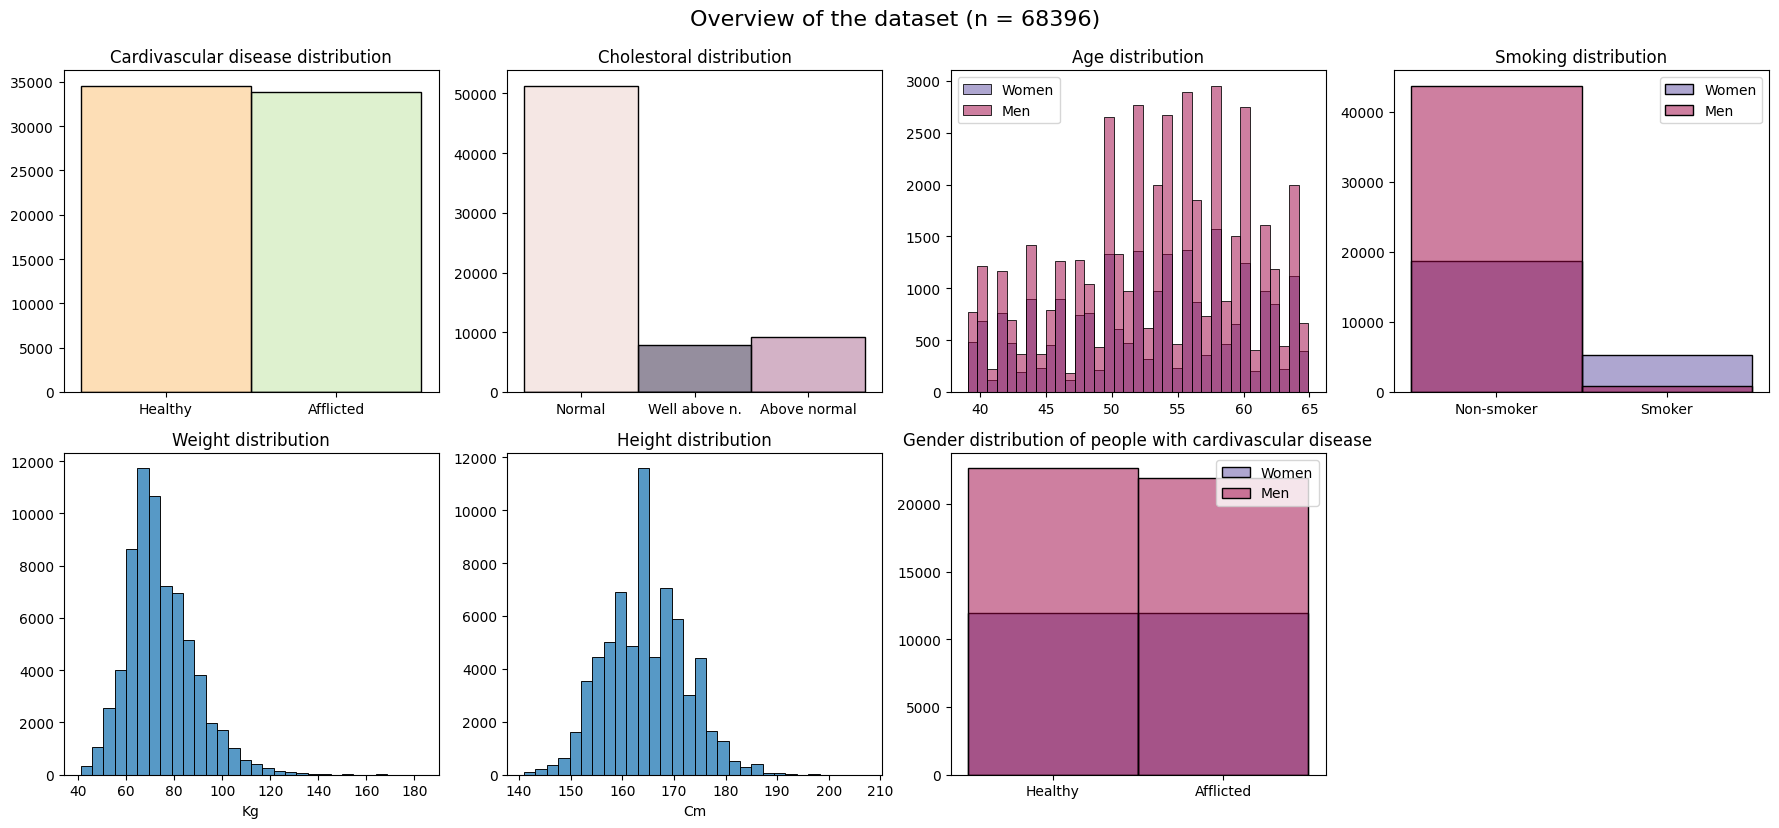

In [4]:
ax, fig = plt.subplots(2, 4, figsize=(18, 8))
# a)
sns.histplot(x=df['cardio'].astype(str), discrete=True, ax=fig[0, 0], hue=df['cardio'], legend=False, palette='Spectral').set(xlabel=None, ylabel=None)
fig[0, 0].set_title('Cardivascular disease distribution')
fig[0, 0].set_xticklabels(['Healthy', 'Afflicted'])
# b)
sns.histplot(x=df['cholesterol'].astype(str), discrete=True, ax=fig[0, 1], hue=df['cholesterol'], legend=False).set(xlabel=None, ylabel=None)
fig[0, 1].set_title('Cholestoral distribution')
fig[0, 1].set_xticklabels(['Normal', 'Well above n.', 'Above normal'])
# c)
sns.histplot(x=df['age'], ax=fig[0, 2], bins=35, hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
fig[0, 2].set_title('Age distribution')
fig[0, 2].legend(['Women', 'Men'])
# d)
sns.histplot(x=df['smoke'].astype(str), discrete=True, ax=fig[0, 3], hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
fig[0, 3].set_title('Smoking distribution')
fig[0, 3].set_xticklabels(['Non-smoker', 'Smoker'])
fig[0, 3].legend(['Women', 'Men'])
# e)
sns.histplot(x=df['weight'], bins=30, ax=fig[1, 0]).set(xlabel="Kg", ylabel=None)
fig[1, 0].set_title('Weight distribution')
# f)
sns.histplot(x=df['height'], bins=30, ax=fig[1, 1]).set(xlabel="Cm", ylabel=None)
fig[1, 1].set_title('Height distribution')
# g)
sns.histplot(x=df['cardio'].astype(str), discrete=True, ax=fig[1, 2], hue=df['gender'], palette='Spectral').set(xlabel=None, ylabel=None)
fig[1, 2].set_title('Gender distribution of people with cardivascular disease')
fig[1, 2].set_xticklabels(['Healthy', 'Afflicted'])
fig[1, 2].legend(['Women', 'Men'])

ax.tight_layout()
ax.delaxes(fig[1, 3])
ax.suptitle('Overview of the dataset (n = 68396)', fontsize=16, y=1.03)


<Axes: >

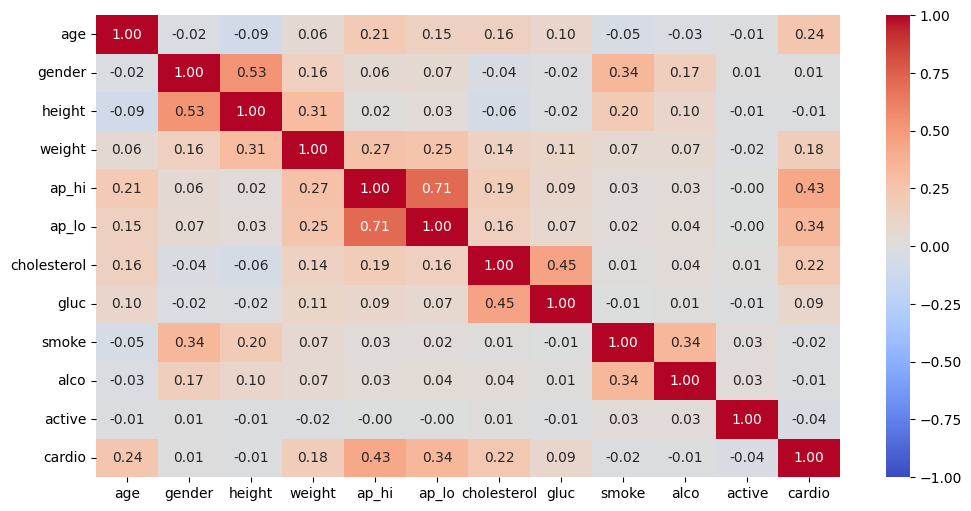

In [5]:
# mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax,
            #mask=mask
            )

In [6]:
df['BMI'] = df['weight'] / (df['height'] / 100)**2

In [7]:
bmi_categories = pd.cut(df['BMI'], [-np.inf, 18.5, 24.9, 29.9, 34.9, np.inf], labels=['Normal weight', 'Overweight', 'Obese (class I)', 'Obese (class II)', 'Obese (class III)'])
bmi_categories = pd.get_dummies(bmi_categories, drop_first=False, dtype=int)
df = pd.concat([df, bmi_categories], axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III)
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,1,0,0,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,0,0,0,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,1,0,0,0
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,0,1,0,0
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,1,0,0,0


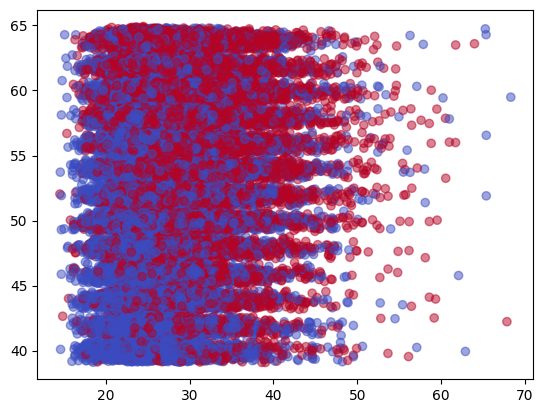

In [8]:
plt.scatter(df['BMI'], df['age'], c=df['cardio'], cmap='coolwarm', alpha=0.5)

<Axes: >

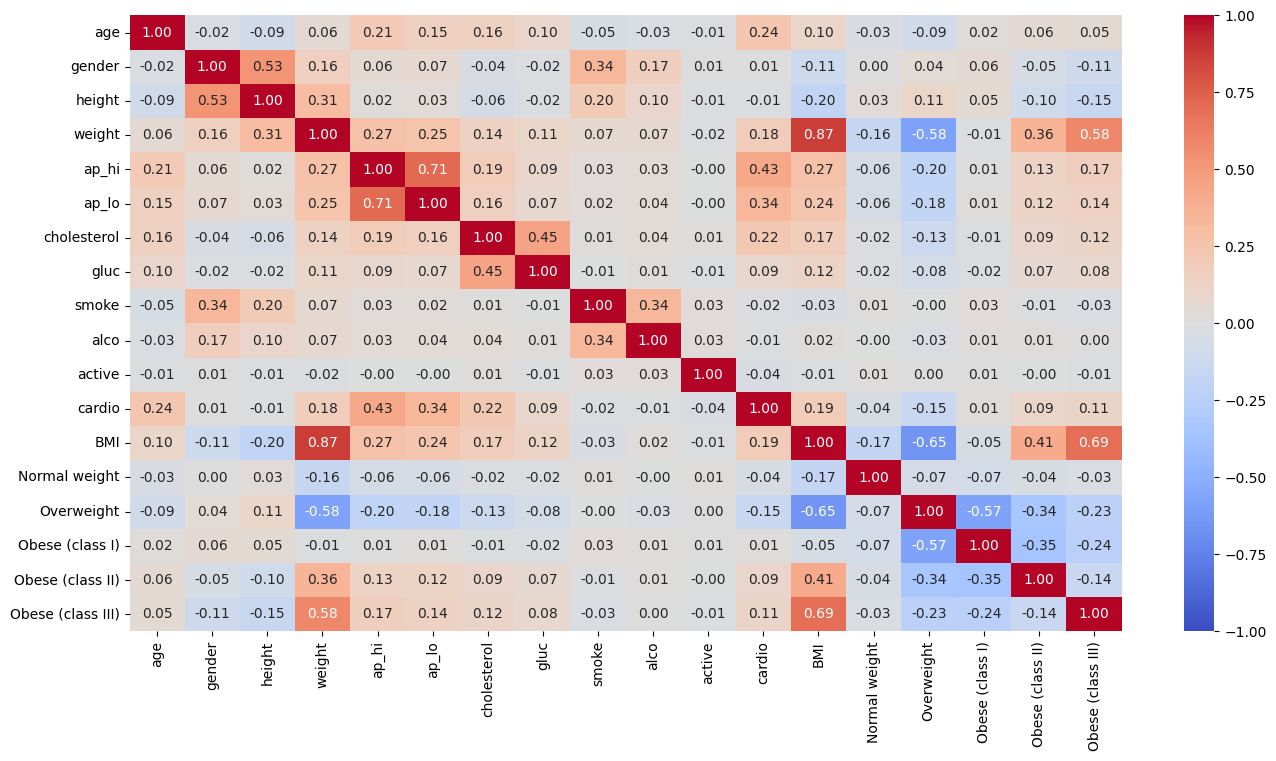

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [10]:
df['BP Healthy'] = ((df['ap_hi'] < 120) & (df['ap_lo'] < 80)).astype(int)
df['BP Elevated'] = ((df['ap_hi'] >= 120) & (df['ap_hi'] < 130) & (df['ap_lo'] < 80)).astype(int)
df['BP Hypertension (stage 1)'] = (((df['ap_hi'] >= 130) & (df['ap_hi'] < 140)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] < 90))).astype(int)
df['BP Hypertension (stage 2)'] = ((df['ap_hi'] >= 140) | (90 <= df['ap_lo'])).astype(int)
df['BP Hypertensive Crisis'] = ((df['ap_hi'] >= 180) | (120 < df['ap_lo'])).astype(int)
# df = df.astype(float)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III),BP Healthy,BP Elevated,BP Hypertension (stage 1),BP Hypertension (stage 2),BP Hypertensive Crisis
0,50.357290,2,168,62.0,110,80,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,51.627652,1,165,64.0,130,70,3,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,48.249144,2,169,82.0,150,100,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,47.841205,1,156,56.0,100,60,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0


<Axes: >

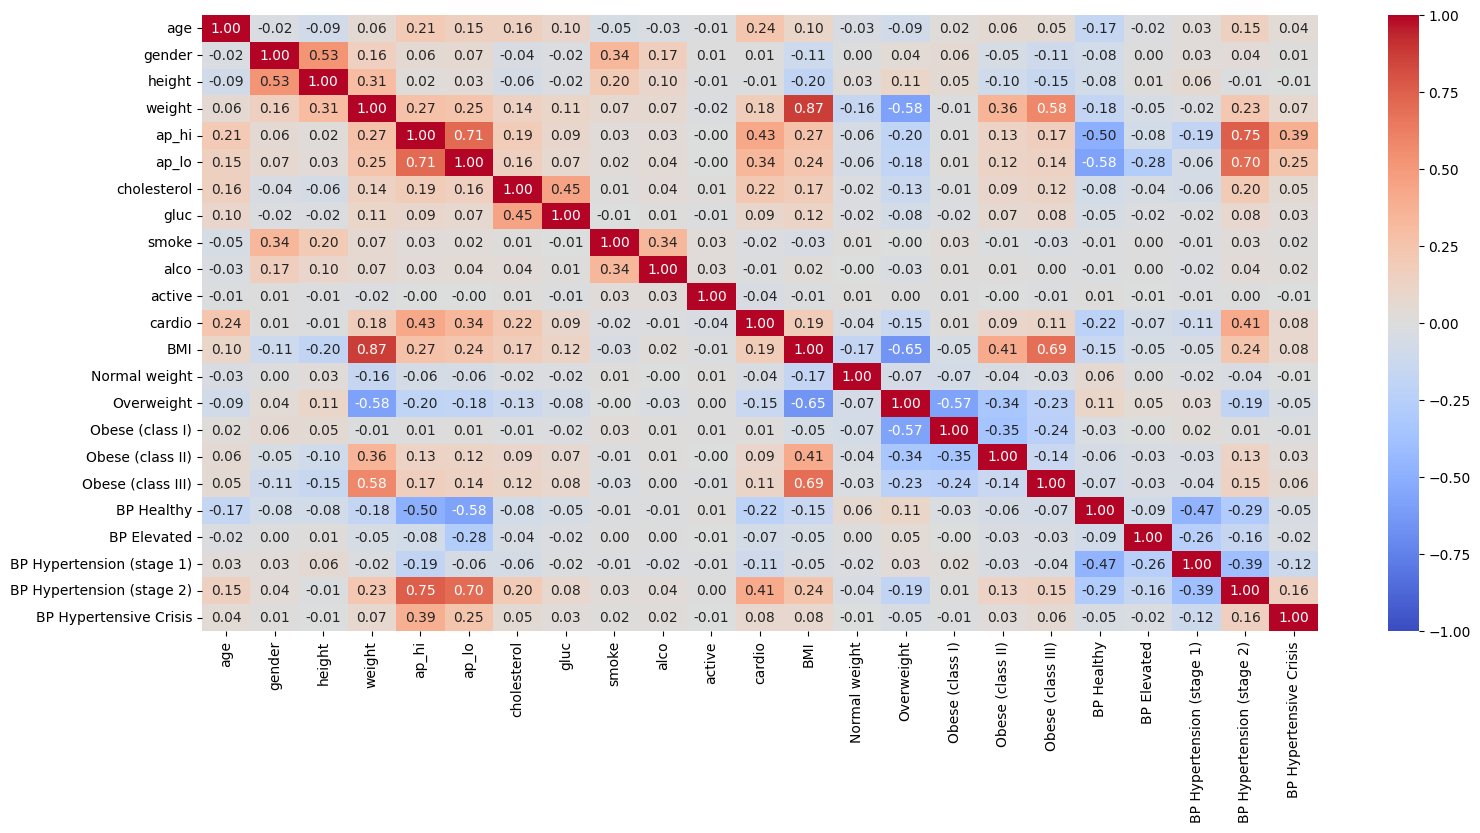

In [11]:
ax, fig = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [12]:
df1 = df.drop(['ap_hi', 'ap_lo', 'height', 'weight','BMI'], axis=1)
df2 = df.drop(['Normal weight', 'Overweight', 'Obese (class I)', 'Obese (class II)', 'Obese (class III)', 'BP Healthy', 'BP Elevated', 'BP Hypertension (stage 1)', 'BP Hypertension (stage 2)', 'BP Hypertensive Crisis', 'height', 'weight'], axis=1)
df2 = pd.get_dummies(columns=['gender'], data=df2, drop_first=True, dtype=int, prefix='male')
display(df1.head(), df2.head())

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,Normal weight,Overweight,Obese (class I),Obese (class II),Obese (class III),BP Healthy,BP Elevated,BP Hypertension (stage 1),BP Hypertension (stage 2),BP Hypertensive Crisis
0,50.357290,2,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,55.381246,1,3,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0
2,51.627652,1,3,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,48.249144,2,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0
4,47.841205,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,male_2
0,50.357290,110,80,1,1,0,0,1,0,21.967120,1
1,55.381246,140,90,3,1,0,0,1,1,34.927679,0
2,51.627652,130,70,3,1,0,0,0,1,23.507805,0
3,48.249144,150,100,1,1,0,0,1,1,28.710479,1
4,47.841205,100,60,1,1,0,0,0,0,23.011177,0


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X, y = df1.drop(columns=['cardio', 'active', 'gluc', 'age', 'Normal weight', 'Overweight'], axis=1), df1['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

scaler = MinMaxScaler()

pipe_log = make_pipeline(scaler, LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=0.1))
# pipe_knn = make_pipeline(scaler, KNeighborsClassifier())
# pipe_svc = make_pipeline(scaler, SVC())

param_grid_log = {'logisticregression__C': [0.1, 1, 5, 10]}
# param_grid_knn = {'kneighborsclassifier__n_neighbors': np.arange(1, 10)}
# param_grid_svc = {'svc__C': [0.1, 1, 5, 10], 'svc__gamma': [0.1, 1, 5, 10]}

grid_log = GridSearchCV(pipe_log, param_grid_log, cv=5)
# grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
# grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=5)

grid_log.fit(X_train, y_train)
# grid_knn.fit(X_train, y_train)
# grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(l1_ratio=0.1,
                                                           max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'logisticregression__C': [0.1, 1, 5, 10]})

In [37]:
grid_log.best_params_, #grid_knn.best_params_, #grid_svc.best_params_

({'logisticregression__C': 1},)

In [ ]:
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# svc = SVC(C=10, kernel='rbf')
# svc.fit(scaled_X_train, y_train)

Logistic Regression
               precision    recall  f1-score   support

           0       0.68      0.81      0.74     17304
           1       0.76      0.62      0.68     16912

    accuracy                           0.72     34216
   macro avg       0.72      0.72      0.71     34216
weighted avg       0.72      0.72      0.71     34216



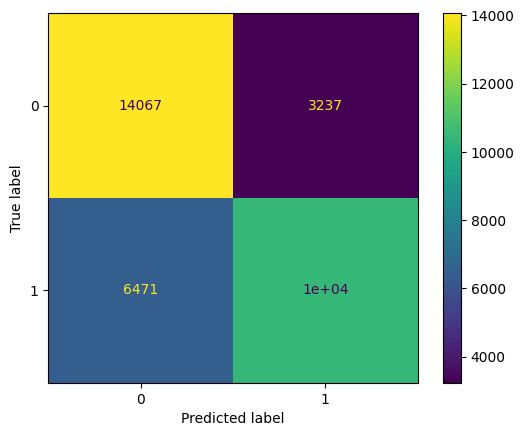

In [38]:
y_pred_log = grid_log.predict(X_test)
# y_pred_knn = grid_knn.predict(X_test)
# y_pred_svc = grid_svc.predict(X_test)
# y_pred_svc = svc.predict(scaled_X_test)

print('Logistic Regression\n', classification_report(y_test, y_pred_log))
# print('KNN\n', classification_report(y_test, y_pred_knn))
# print('Random Forest\n', classification_report(y_test, y_pred_svc))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc)).plot()